In [1]:
import sys
sys.path.append("..")
import lib
import numpy as np
import lib.variational_method as variational
from lib.variational_method.variational import method
from lib.data import super_gauss
from lib.mesurements import mse
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_square_grid(M):
    """
    M - degree of grid
    """
    dim = 2 ** M * 1j
    return np.mgrid[-np.pi:np.pi:dim, -np.pi:np.pi:dim]
def normilize(front):
    front -= front.min()
    front /= front.max()
    return front

0.0017539452473710382


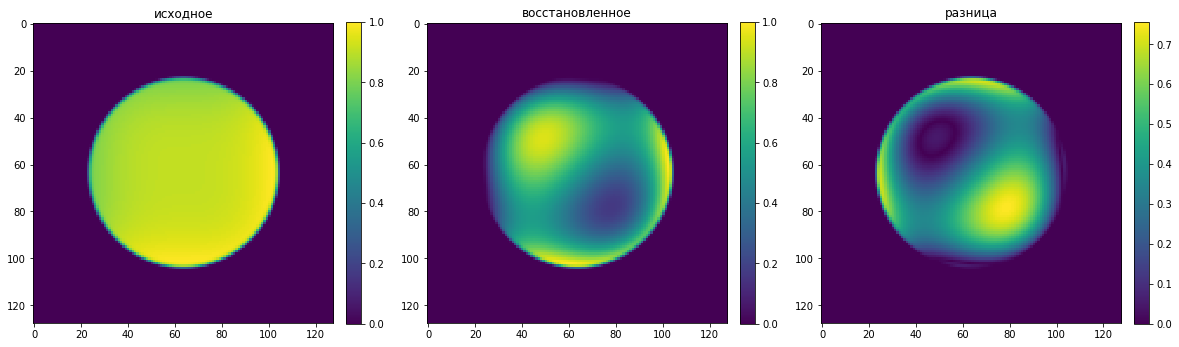

In [3]:
M = 7
x, y = create_square_grid(M)
h = 2 * np.pi / 2**M
gauss = super_gauss(x, y, 2, 40)
front = x**3 + y**3
g1 = 3 * x**2
g2 = 3 * y**2

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)

restored_front = method(g1, g2, h, h, 0.0002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

Шаг сетки равен ли h?

In [4]:
h1 = x[i, 0] - x[i - 1, 0]
for i in range(1,len(x)):
    print(x[i, 0] - x[i - 1, 0] - h1, )

NameError: name 'i' is not defined

В общем np.mgrid работало не так как я ожидал

0.0009426512779915115


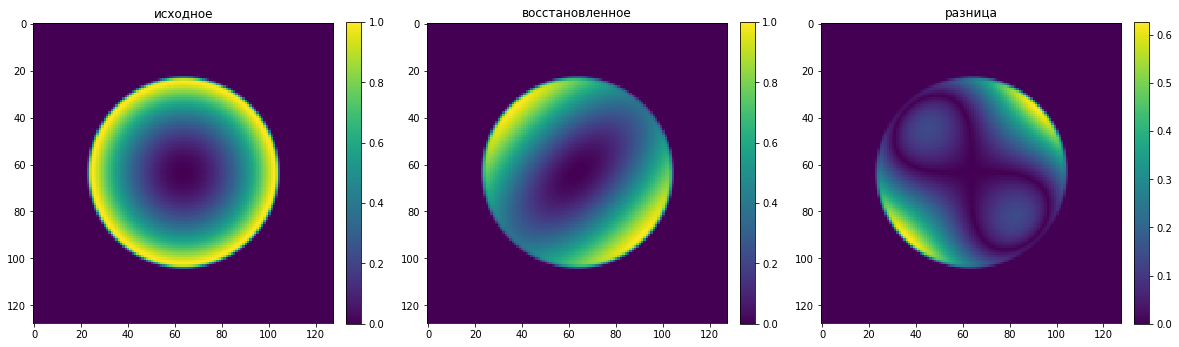

In [5]:
M = 7
x, y = create_square_grid(M)
h = x[1,0] - x[0,0]
gauss = super_gauss(x, y, 2, 40)
front = x**2 + y**2
g1 = 2 * x
g2 = 2 * y

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)

restored_front = method(g1, g2, h, h, 0.0002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

C правильным h работает неправильно

2.2288586325356756e-05


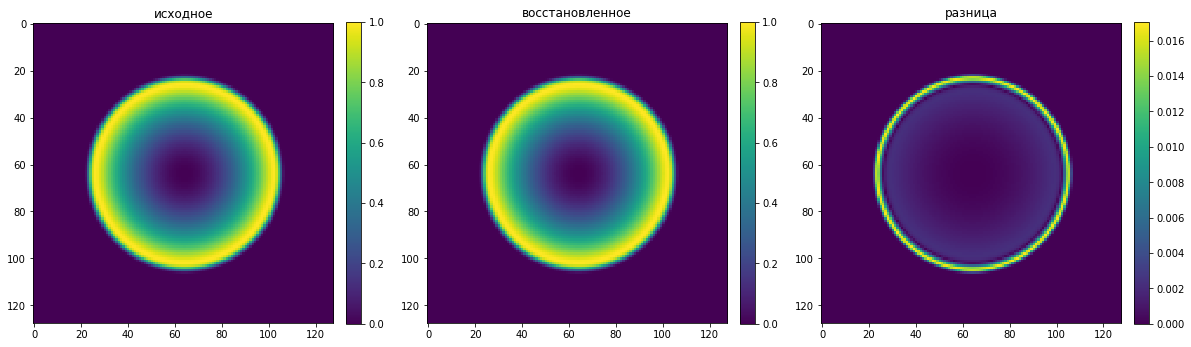

In [25]:
M = 7
h = 2 * np.pi / 2**M
x, y = np.mgrid[-np.pi:np.pi:h, -np.pi:np.pi:h]
h1 = x[1,0] - x[0,0]
h2 = y[0,1] - y[0,0]
gauss = super_gauss(x, y, 2, 20)
front = x**2 + y**2
g1 = 2 * x
g2 = 2 * y

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)

restored_front = method(g1, g2, h1, h2, 0.0002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

3.251265630049985e-05


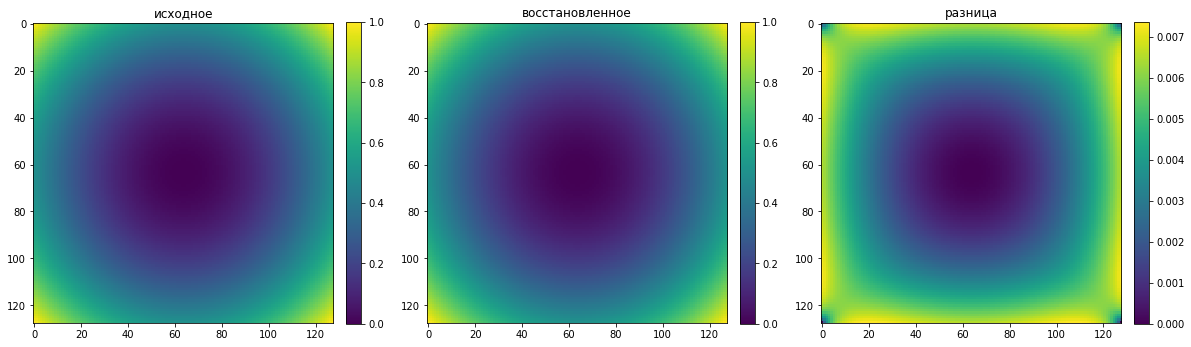

In [28]:
M = 7
h = 2 * np.pi / 2**M
x_, h1 = np.linspace(-np.pi, np.pi, 2**M, retstep = True)
h1 = h
y_ = x_

h2 = h1
x, y = np.meshgrid(x_, y_, indexing = 'ij')
gauss = super_gauss(x, y, 5, 30)
front = x**2 + y**2
g1 = 2 * x
g2 = 2 * y

g1 *= gauss
g2 *= gauss
front = normilize(front)
front *= gauss
front = normilize(front)

restored_front = method(g1, g2, h1, h2, 0.0002, 0.001)

restored_front = normilize(restored_front)
restored_front *= gauss
restored_front = normilize(restored_front)

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (20, 40))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)